In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from keras_preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.layers import Dense,Dropout,SpatialDropout2D,BatchNormalization
import glob, os, random

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
rootPath = '/content/gdrive/My Drive/Dataset/GarbageClassification/'
classNames = sorted(os.listdir(rootPath))
nClasses = len(classNames)
print(f"Number of Classes : {nClasses}")

Number of Classes : 6


In [ ]:
img_list = glob.glob(os.path.join(rootPath, '*/*.jpg'))
print(len(img_list))

2527


In [ ]:
train_garbage=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.2,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test_garbage=ImageDataGenerator(rescale=1/255,
                        validation_split=0.2)

train_generator_g=train_garbage.flow_from_directory(rootPath,
                                          target_size=(100,100),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training',seed=42)

test_generator_g=test_garbage.flow_from_directory(rootPath,
                                        target_size=(100,100),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation',seed=42)

labels = (train_generator_g.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
labels_garbage = os.listdir(rootPath)

In [ ]:
for i in labels_garbage:
    directory = os.path.join(rootPath, i)
    print("Images of label \"" + i + "\":\t", len(os.listdir(directory)))

Images of label "paper":	 594
Images of label "trash":	 137
Images of label "glass":	 501
Images of label "plastic":	 482
Images of label "cardboard":	 403
Images of label "metal":	 410


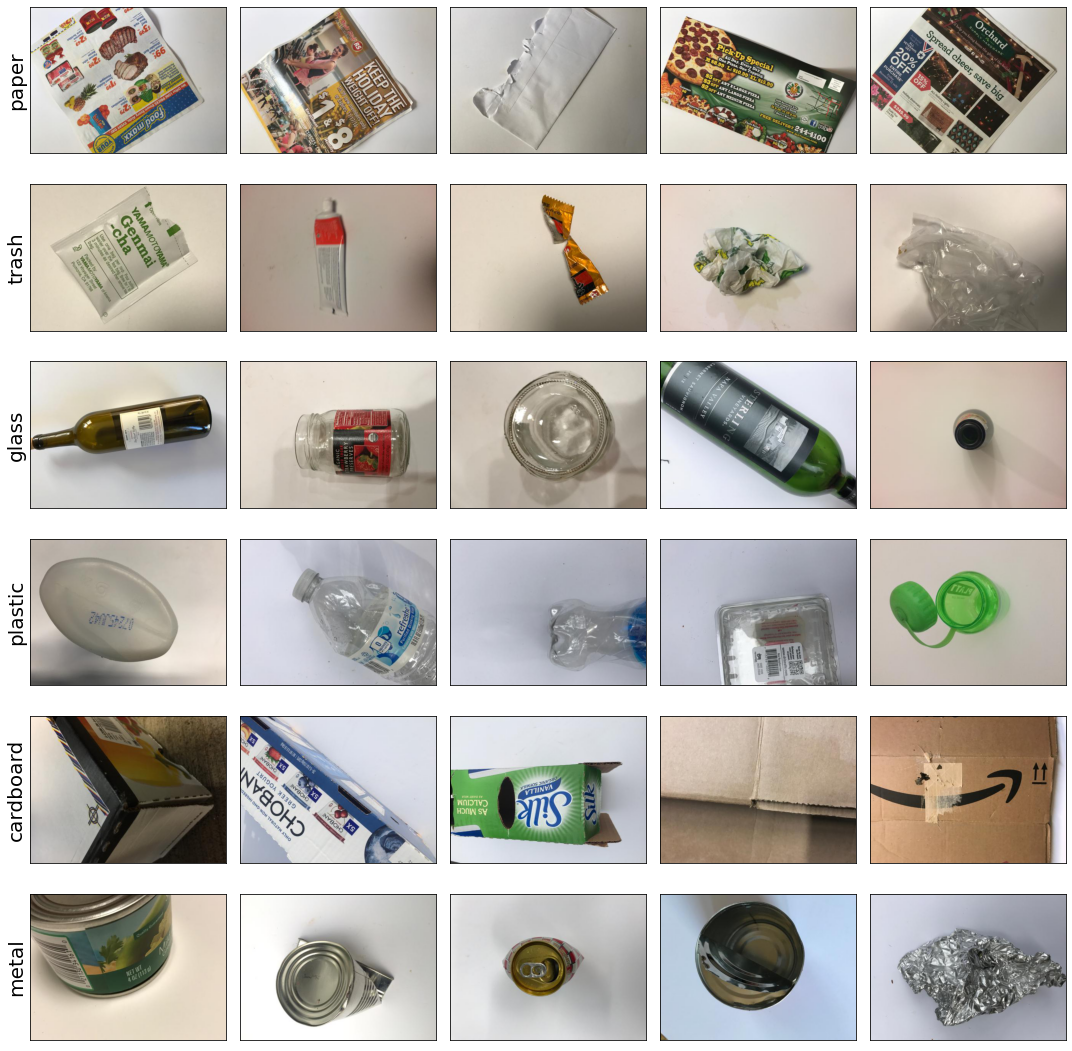

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(15,15))

for i in range(6):
    directory = os.path.join(rootPath, labels_garbage[i])
    for j in range(5):
        path = os.path.join(directory, os.listdir(directory)[j])
        img = mpimg.imread(path)
        plt.subplot(6, 5, i*5 + j + 1)
        plt.imshow(img)
        if j == 0:
            plt.ylabel(labels_garbage[i], fontsize=20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [ ]:
for image_batch, label_batch in train_generator_g:
  break
image_batch.shape, label_batch.shape

((32, 100, 100, 3), (32, 6))

In [ ]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(100, 100, 3)),
        layers.Dropout(0.1),
        layers.Dense(1000, activation="relu"),
        layers.Dense(750, activation="relu"),
        layers.Dense(500, activation="relu"),
        layers.Dense(250, activation="relu"),
        layers.Dense(125, activation="relu"),
        layers.Dense(6, activation="softmax"),
    ]
)

model.build((100, 100, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dropout (Dropout)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 1000)              30001000  
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dense_3 (Dense)             (None, 250)               125250    
                                                                 
 dense_4 (Dense)             (None, 125)               3

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit_generator(train_generator_g,
                              epochs=50,
                              steps_per_epoch=32,
                              validation_data=test_generator_g,
                              validation_steps=32)

<ipython-input-11-7da9987e687b>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator_g,


Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 9.1103 - acc: 0.1840

32/32 [==============================] - 191s 6s/step - loss: 9.1103 - acc: 0.1840 - val_loss: 2.5341 - val_acc: 0.1988
Epoch 2/50
32/32 [==============================] - 55s 2s/step - loss: 1.8683 - acc: 0.2148
Epoch 3/50
32/32 [==============================] - 25s 788ms/step - loss: 1.7629 - acc: 0.2432
Epoch 4/50
32/32 [==============================] - 19s 602ms/step - loss: 1.6629 - acc: 0.2920
Epoch 5/50
32/32 [==============================] - 12s 378ms/step - loss: 1.6193 - acc: 0.3389
Epoch 6/50
32/32 [==============================] - 9s 270ms/step - loss: 1.5720 - acc: 0.3525
Epoch 7/50
32/32 [==============================] - 8s 241ms/step - loss: 1.5365 - acc: 0.3700
Epoch 8/50
32/32 [==============================] - 7s 230ms/step - loss: 1.5215 - acc: 0.3820
Epoch 9/50
32/32 [==============================] - 6s 196ms/step - loss: 1.4603 - acc: 0.3910
Epoch 10/50
32/32 [==============================] - 6s 199ms/step - loss: 1.5081 - acc: 0.3680
Epoch 11/50
32/32 [====

In [ ]:
score1= model.evaluate(test_generator_g, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.521828293800354
Test accuracy: 0.3896620273590088


In [ ]:
history

##### Accuracy plots

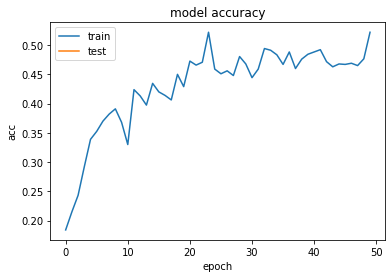

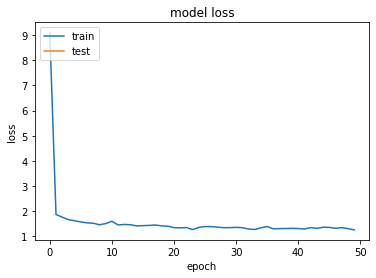

In [ ]:
def line_plot(series, legends, title, ylabel, xlabel):
  for serie in series:
      plt.plot(serie)
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.legend(legends, loc='upper left')
  #plt.ylim([0, 1.1])
  plt.show()

line_plot(
    [history.history['acc'], history.history['val_acc']],
    ['train', 'test'],
    'model accuracy',
    'acc',
    'epoch'
)

line_plot(
    [history.history['loss'], history.history['val_loss']],
    ['train', 'test'],
    'model loss',
    'loss',
    'epoch'
)

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
model2=Sequential()

model2.add(Conv2D(32,(3,3), padding='same',input_shape=(100,100,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())

model2.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(6,activation='softmax'))

filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history2 = model2.fit_generator(train_generator_g,
                              epochs=100,
                              steps_per_epoch=2024//32,
                              validation_data=test_generator_g,
                              validation_steps=502//16,
                              workers = 4,
                              callbacks=callbacks_list)

<ipython-input-17-290ac7b0ec3e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model2.fit_generator(train_generator_g,


Epoch 1/100
63/63 [==============================] - ETA: 0s - loss: 1.9367 - acc: 0.3976
Epoch 1: val_acc improved from -inf to 0.23601, saving model to trained_model.h5
63/63 [==============================] - 19s 183ms/step - loss: 1.9367 - acc: 0.3976 - val_loss: 2.1859 - val_acc: 0.2360
Epoch 2/100
62/63 [============================>.] - ETA: 0s - loss: 1.4690 - acc: 0.4490
Epoch 2: val_acc improved from 0.23601 to 0.26958, saving model to trained_model.h5
63/63 [==============================] - 13s 197ms/step - loss: 1.4696 - acc: 0.4483 - val_loss: 2.3295 - val_acc: 0.2696
Epoch 3/100
63/63 [==============================] - ETA: 0s - loss: 1.3879 - acc: 0.4809
Epoch 3: val_acc improved from 0.26958 to 0.31129, saving model to trained_model.h5
63/63 [==============================] - 17s 262ms/step - loss: 1.3879 - acc: 0.4809 - val_loss: 3.0328 - val_acc: 0.3113
Epoch 4/100
63/63 [==============================] - ETA: 0s - loss: 1.3549 - acc: 0.4930
Epoch 4: val_acc did not 

In [ ]:
score2= model2.evaluate(test_generator_g, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 1.6848416328430176
Test accuracy: 0.5924453139305115


#### Accuracy plots

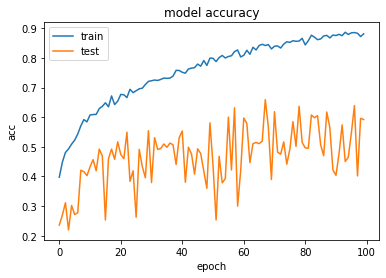

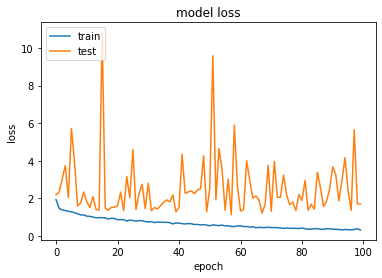

In [ ]:
def line_plot(series, legends, title, ylabel, xlabel):
    for serie in series:
        plt.plot(serie)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(legends, loc='upper left')
    #plt.ylim([0, 1.1])
    plt.show()

line_plot(
    [history2.history['acc'], history2.history['val_acc']],
    ['train', 'test'],
    'model accuracy',
    'acc',
    'epoch'
)

line_plot(
    [history2.history['loss'], history2.history['val_loss']],
    ['train', 'test'],
    'model loss',
    'loss',
    'epoch'
)

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator_g.samples/test_generator_g.batch_size)
predictions = model.predict_generator(test_generator_g, steps=test_steps_per_epoch)
predicted_classes1 = np.argmax(predictions, axis=1)

<ipython-input-20-eaebe9ac56a3>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator_g, steps=test_steps_per_epoch)


In [ ]:
from sklearn import metrics
true_classes = test_generator_g.classes
class_labels = list(test_generator_g.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes1, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.24      0.12      0.16        80
       glass       0.25      0.33      0.29       100
       metal       0.05      0.01      0.02        82
       paper       0.24      0.48      0.32       118
     plastic       0.19      0.14      0.16        96
       trash       0.00      0.00      0.00        27

    accuracy                           0.23       503
   macro avg       0.16      0.18      0.16       503
weighted avg       0.19      0.23      0.19       503



In [ ]:
def plot_cm(cm, title = ""):
    fig = px.imshow(cm,x=class_labels,y=class_labels,title=title)
    fig.show()

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(true_classes, predicted_classes1,normalize='true')
plot_cm(conf_mat, "Confusion Matrix (Test)")

In [ ]:
predictions = model2.predict_generator(test_generator_g,steps=test_steps_per_epoch)
predicted_classes2 = np.argmax(predictions, axis=1)

<ipython-input-24-0e53ea66af28>:1: UserWarning:

`Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.



In [ ]:
report = metrics.classification_report(true_classes,predicted_classes2,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   cardboard       0.17      0.09      0.12        80
       glass       0.29      0.19      0.23       100
       metal       0.10      0.07      0.08        82
       paper       0.22      0.46      0.29       118
     plastic       0.23      0.16      0.19        96
       trash       0.12      0.07      0.09        27

    accuracy                           0.20       503
   macro avg       0.19      0.17      0.17       503
weighted avg       0.20      0.20      0.19       503



In [ ]:
conf_mat = confusion_matrix(true_classes,predicted_classes2,normalize='true')
plot_cm(conf_mat, "Confusion Matrix (Test) Model 2")